# 이상치 정제

1. 결측치 정제를 우선적으로 수행
2. 이상치 찾기
    * 상자그림을 통해 이상치가 존재하는 변수를 찾는다.
    * 이상치가 발견된 경우 해당 변수의 극단치 경계값을 계산
3. 이상치를 결측치로 변경
4. 결측치 정제 방법 적용

## #01. 작업 준비

### 패키지 가져오기

In [1]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
import sys
import os

In [2]:
# helper.py 파일이 존재하는 폴더 위치를 파이썬 라이브러리 경로에 추가
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

In [3]:
from helper import getIq, replaceOutlier, replaceMissingValue

### 데이터 가져오기

In [4]:
df = read_excel("https://data.hossam.kr/D03/ref_sample.xlsx", index_col="이름")
df

,국어,영어,수학,과학
이름,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,NaN,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN
영호,80.0,88,91.0,72.0
용식,82.0,88,NaN,90.0
나영,90.0,92,81.0,NaN
석영,91.0,90,89.0,80.0


## #02. 결측치 정제하기

In [5]:
re_df = replaceMissingValue(df)

## #03. 이상치가 존재하는 변수 찾기

### 그래프 기본 설정

In [6]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

### 상자그림

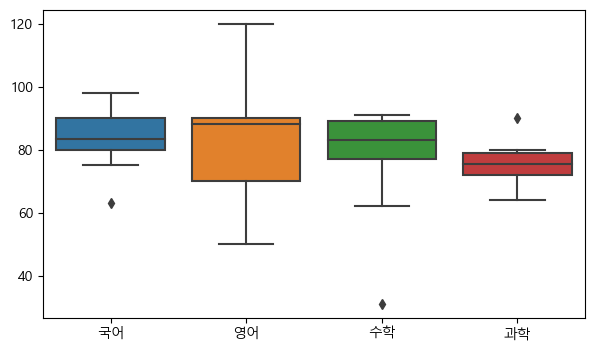

In [7]:
plt.figure()
sb.boxplot(data=re_df)
plt.show()
plt.close()

### 찾아낸 이상치

1. 상자그림을 통해 검출된 국어, 수학, 과학 점수
2. 분석가의 주관에 따른 영어 점수 (`> 100`)

### 이상치를 결측치로 변경 (구현한 함수 호출)

In [8]:
re_df = replaceOutlier(re_df, ["국어", "수학", "과학"])
re_df

,국어,영어,수학,과학
이름,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,NaN,60.0,NaN,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,NaN
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


### 영어 점수 처리

분석가에 주관에 따른 이상치 선정 결과

In [9]:
re_df.loc[re_df["영어"] > 100, "영어"] = np.nan
re_df

,국어,영어,수학,과학
이름,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,NaN,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,NaN,60.0,NaN,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,NaN
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


### 변경된 결측치에 대한 처리

In [10]:
final_df = replaceMissingValue(re_df)
final_df

,국어,영어,수학,과학
이름,,,,
철수,98.000000,77.000,88.000000,64.000000
영희,88.000000,76.875,62.000000,72.000000
민철,83.375000,70.000,83.000000,79.000000
수현,85.921875,60.000,82.609375,71.000000
호영,75.000000,50.000,90.000000,75.428571
영호,80.000000,88.000,91.000000,72.000000
용식,82.000000,88.000,76.875000,73.607143
나영,90.000000,92.000,81.000000,75.428571
석영,91.000000,90.000,89.000000,80.000000
